In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from harmony import harmonize
import hdbscan
import seaborn as sns
from matplotlib import pyplot as plt

import sys
sys.path.append("../resources/")
import sct

In [2]:
adata = sc.read_h5ad('../data/adata_all_panPN_annotated_final.h5ad')

In [3]:
df_libs = pd.read_csv("../data/libs.csv", sep="\t", header=0, index_col=0) # sample info

In [4]:
df = adata.to_df().T

In [5]:
df = df.fillna(0)
X = df

In [6]:
X

,PN_0h_VTGAL4_P1_A12,PN_0h_VTGAL4_P1_A15,PN_0h_VTGAL4_P1_A18,PN_0h_VTGAL4_P1_A19,PN_0h_VTGAL4_P1_A1,PN_0h_VTGAL4_P1_A20,PN_0h_VTGAL4_P1_A21,PN_0h_VTGAL4_P1_A2,PN_0h_VTGAL4_P1_A3,PN_0h_VTGAL4_P1_A4,...,PN_adult_GH146_P12_N17,PN_adult_GH146_P12_N18,PN_adult_GH146_P12_N23,PN_adult_GH146_P12_N5,PN_adult_GH146_P12_N7,PN_adult_GH146_P12_O23,PN_adult_GH146_P12_O2,PN_adult_GH146_P12_O4,PN_adult_GH146_P12_O7,PN_adult_GH146_P12_P11
7SLRNA:CR32864,1.995601,0.365471,0.0,0.000000,0.00000,0.0000,0.000000,0.815085,0.000000,0.337745,...,0.0,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.137341
a,0.000000,0.000000,0.0,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0000,0.000000,0.000000,0.0,5.432071,0.000000,0.0,0.000000
abd-A,0.000000,0.000000,0.0,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0000,0.000000,2.649762,0.0,0.000000,0.000000,0.0,0.000000
Abd-B,0.000000,0.000000,0.0,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.029642,0.0000,0.000000,4.072699,0.0,0.000000,0.000000,0.0,0.000000
Abl,7.479131,9.258879,0.0,0.550769,2.71304,5.5118,2.195715,8.670647,10.622009,0.000000,...,0.0,0.000000,5.7948,4.484755,0.000000,0.0,8.224689,2.336059,0.0,5.112410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tRNA:Arg-ACG-1-6,0.000000,0.000000,0.0,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
tRNA:Ile-AAT-2-1Psi,0.000000,0.000000,0.0,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
dUTPase,0.000000,0.000000,0.0,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
tRNA:His-GTG-2-1Psi,0.000000,0.000000,0.0,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000


# Identify marker genes using ICIM

In [12]:
import importlib
importlib.reload(sct)
myICIM = sct.ICIM(X, df, TFs=[], CSMs=[], exclude=[], N=100,
                  correlation_cutoff=0.5,
                  min_hits=3,
                  exclude_max=2,
                  dropout_rate_low=0.3,
                  dropout_rate_high=1.0,
                  metric="correlation",
                  stop_condition="linkage_dist",
                  N_stop=50,
                  linkage_dist_stop=0.2)

In [14]:
myICIM.calc(verbose=True)

Initial step
Found 112 genes
Child populations 3516 117

01
Found 50 genes
Child populations 116 1

010
Found 57 genes
Child populations 92 24

0101
Found 420 genes
Failed linkage distance condition. Stopping.

0100
Found 82 genes
Child populations 89 3

01000
Found 64 genes
Child populations 74 15

010000
Found 51 genes
Child populations 73 1

0100000
Found 60 genes
Child populations 72 1

01000000
Found 59 genes
Child populations 71 1

010000000
Found 62 genes
Child populations 14 57

0100000001
Found 182 genes
Failed linkage distance condition. Stopping.

00
Found 92 genes
Child populations 3513 3

000
Found 92 genes
Child populations 3512 1

0000
Found 91 genes
Child populations 3505 7

00000
Found 86 genes
Child populations 3504 1

000000
Found 86 genes
Child populations 3503 1

0000000
Found 86 genes
Child populations 3502 1

00000000
Found 86 genes
Child populations 2062 1440

000000000
Found 34 genes
Child populations 2000 62

0000000000
Found 33 genes
Child populations 1869 13

In [16]:
genes_GH146_ICIM = myICIM.get_all_markers()
print("Genes found by ICIM", len(genes_GH146_ICIM))

Genes found by ICIM 1216


In [17]:
adata.obs.stage.value_counts()

0h       1158
24h       946
48h       888
adult     641
Name: stage, dtype: int64

In [19]:
# Subset data to genes desired
Y = X.loc[genes_GH146_ICIM]
import importlib
# Calculate TSNE
importlib.reload(sct)
from sklearn.manifold import TSNE
myTSNE = sct.TSNE(X.loc[genes_GH146_ICIM], X, df_libs)
myTSNE.calc_TSNE(perplexity=80, learning_rate=250, early_exaggeration=4.0, method="exact", random_state=1)

[t-SNE] Computed conditional probabilities for sample 1000 / 3633
[t-SNE] Computed conditional probabilities for sample 2000 / 3633
[t-SNE] Computed conditional probabilities for sample 3000 / 3633
[t-SNE] Computed conditional probabilities for sample 3633 / 3633
[t-SNE] Mean sigma: 0.127715
[t-SNE] Iteration 50: error = 15.5999134, gradient norm = 0.0048196 (50 iterations in 18.349s)
[t-SNE] Iteration 100: error = 15.2030690, gradient norm = 0.0004440 (50 iterations in 18.240s)
[t-SNE] Iteration 150: error = 15.1673491, gradient norm = 0.0000739 (50 iterations in 19.198s)
[t-SNE] Iteration 200: error = 15.1630532, gradient norm = 0.0000207 (50 iterations in 23.042s)
[t-SNE] Iteration 250: error = 15.1624500, gradient norm = 0.0000134 (50 iterations in 21.345s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 15.162450
[t-SNE] Iteration 300: error = 1.3828814, gradient norm = 0.0007377 (50 iterations in 20.986s)
[t-SNE] Iteration 350: error = 1.2379773, gradient norm

In [20]:
adata.obsm['X_tsne'] = myTSNE.X_tsne

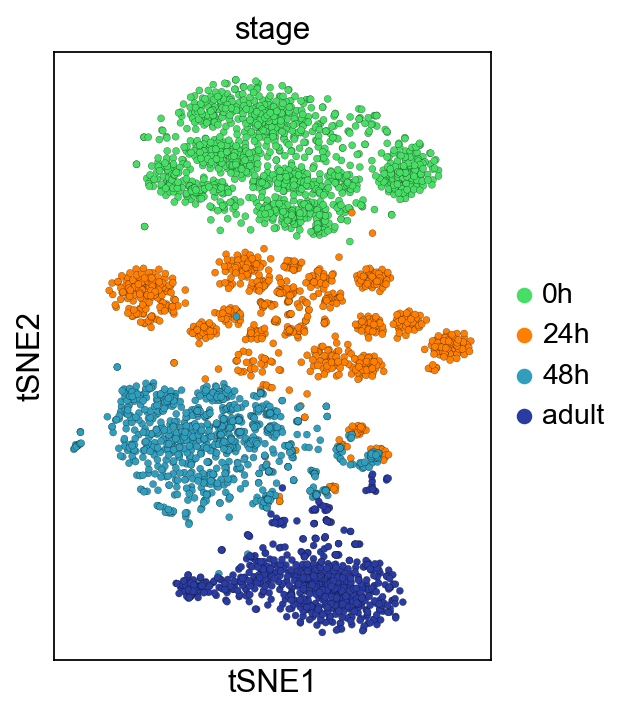

In [21]:
sc.set_figure_params(figsize=(3.5,5),dpi_save=600)
sc.pl.tsne(adata,color='stage', size=(40,40), edgecolor="k", linewidths=0.1)#,save='_prep80_edge_stage.pdf')

# Identify differentially expressed (DE) genes

In [23]:
names_0h = list(adata[adata.obs['stage'] == '0h'].obs_names)
print("0h PN:",len(names_0h))
names_24h = list(adata[adata.obs['stage'] == '24h'].obs_names)
print("24h PN:",len(names_24h))
names_48h = list(adata[adata.obs['stage'] == '48h'].obs_names)
print("48h PN:",len(names_48h))
names_adult = list(adata[adata.obs['stage'] == 'adult'].obs_names)
print("adult PN:",len(names_adult))

0h PN: 1158
24h PN: 946
48h PN: 888
adult PN: 641


In [24]:
df = adata.to_df().T

In [26]:
# Identifying Differentially expressed genes between any two pairs
# It takes ~10min

# df_DE_0h_24h = sct.calc_DE_mannwhitneyu(df, names_0h, names_24h)
# df_DE_0h_24h.to_csv("../to_upload/data_PN/df_DE_0h_24h.csv")
df_DE_0h_24h = pd.read_csv("./to_upload/data_PN/df_DE_0h_24h.csv", sep=",", header=0, index_col=0) # sample info

In [28]:
# df_DE_0h_48h = sct.calc_DE_mannwhitneyu(df, names_0h, names_48h)
# df_DE_0h_48h.to_csv("../to_upload/data_PN/df_DE_0h_48h.csv")
df_DE_0h_48h = pd.read_csv("../to_upload/data_PN/df_DE_0h_48h.csv", sep=",", header=0, index_col=0) # sample info

In [29]:
# df_DE_0h_adult = sct.calc_DE_mannwhitneyu(df, names_0h, names_adult)
# df_DE_0h_adult.to_csv("../to_upload/data_PN/df_DE_0h_adult.csv")
df_DE_0h_adult = pd.read_csv("../to_upload/data_PN/df_DE_0h_adult.csv", sep=",", header=0, index_col=0) # sample info

In [30]:
# df_DE_24h_48h = sct.calc_DE_mannwhitneyu(df, names_24h, names_48h)
# df_DE_24h_48h.to_csv("../to_upload/data_PN/df_DE_24h_48h.csv")
df_DE_24h_48h = pd.read_csv("../to_upload/data_PN/df_DE_24h_48h.csv", sep=",", header=0, index_col=0) # sample info

In [31]:
# df_DE_24h_adult = sct.calc_DE_mannwhitneyu(df, names_24h, names_adult)
# df_DE_24h_adult.to_csv("../to_upload/data_PN/df_DE_24h_adult.csv")
df_DE_24h_adult = pd.read_csv("../to_upload/data_PN/df_DE_24h_adult.csv", sep=",", header=0, index_col=0) # sample info

In [32]:
# df_DE_48h_adult = sct.calc_DE_mannwhitneyu(df, names_48h, names_adult)
# df_DE_48h_adult.to_csv("../to_upload/data_PN/df_DE_48h_adult.csv")
df_DE_48h_adult = pd.read_csv("../to_upload/data_PN/df_DE_48h_adult.csv", sep=",", header=0, index_col=0) # sample info

In [33]:
Number_genes = 30
names_df_DE_0h_24h = df_DE_0h_24h.index[0:Number_genes]
names_df_DE_0h_48h = df_DE_0h_48h.index[0:Number_genes]
names_df_DE_0h_adult = df_DE_0h_adult.index[0:Number_genes]
names_df_DE_24h_48h = df_DE_24h_48h.index[0:Number_genes]
names_df_DE_24h_adult = df_DE_24h_adult.index[0:Number_genes]
names_df_DE_48h_adult = df_DE_48h_adult.index[0:Number_genes]

combined_DE_genes = set(list(names_df_DE_0h_24h)+list(names_df_DE_0h_48h)+list(names_df_DE_0h_adult)+
                       list(names_df_DE_24h_48h)+list(names_df_DE_24h_adult)+list(names_df_DE_48h_adult))

In [38]:
Z = df.loc[combined_DE_genes]
Z.head(3)

,PN_0h_VTGAL4_P1_A12,PN_0h_VTGAL4_P1_A15,PN_0h_VTGAL4_P1_A18,PN_0h_VTGAL4_P1_A19,PN_0h_VTGAL4_P1_A1,PN_0h_VTGAL4_P1_A20,PN_0h_VTGAL4_P1_A21,PN_0h_VTGAL4_P1_A2,PN_0h_VTGAL4_P1_A3,PN_0h_VTGAL4_P1_A4,...,PN_adult_GH146_P12_N17,PN_adult_GH146_P12_N18,PN_adult_GH146_P12_N23,PN_adult_GH146_P12_N5,PN_adult_GH146_P12_N7,PN_adult_GH146_P12_O23,PN_adult_GH146_P12_O2,PN_adult_GH146_P12_O4,PN_adult_GH146_P12_O7,PN_adult_GH146_P12_P11
Gdh,7.393826,7.784910,0.000000,9.773055,5.637444,9.462826,8.160901,8.200839,0.000000,9.932194,...,0.000000,0.000000,10.535641,7.596236,0.0,11.642624,5.747300,0.000000,0.000000,9.552371
l(3)neo38,9.631799,9.440152,11.392426,8.124070,2.234096,6.581388,9.694171,9.954226,9.506782,7.099194,...,0.000000,0.000000,8.433221,4.301286,0.0,0.000000,8.791928,0.000000,10.007730,6.116569
CG31808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.447703,10.822697,8.354785,12.086722,0.0,10.618286,10.098475,10.385918,10.745209,10.591224


[]

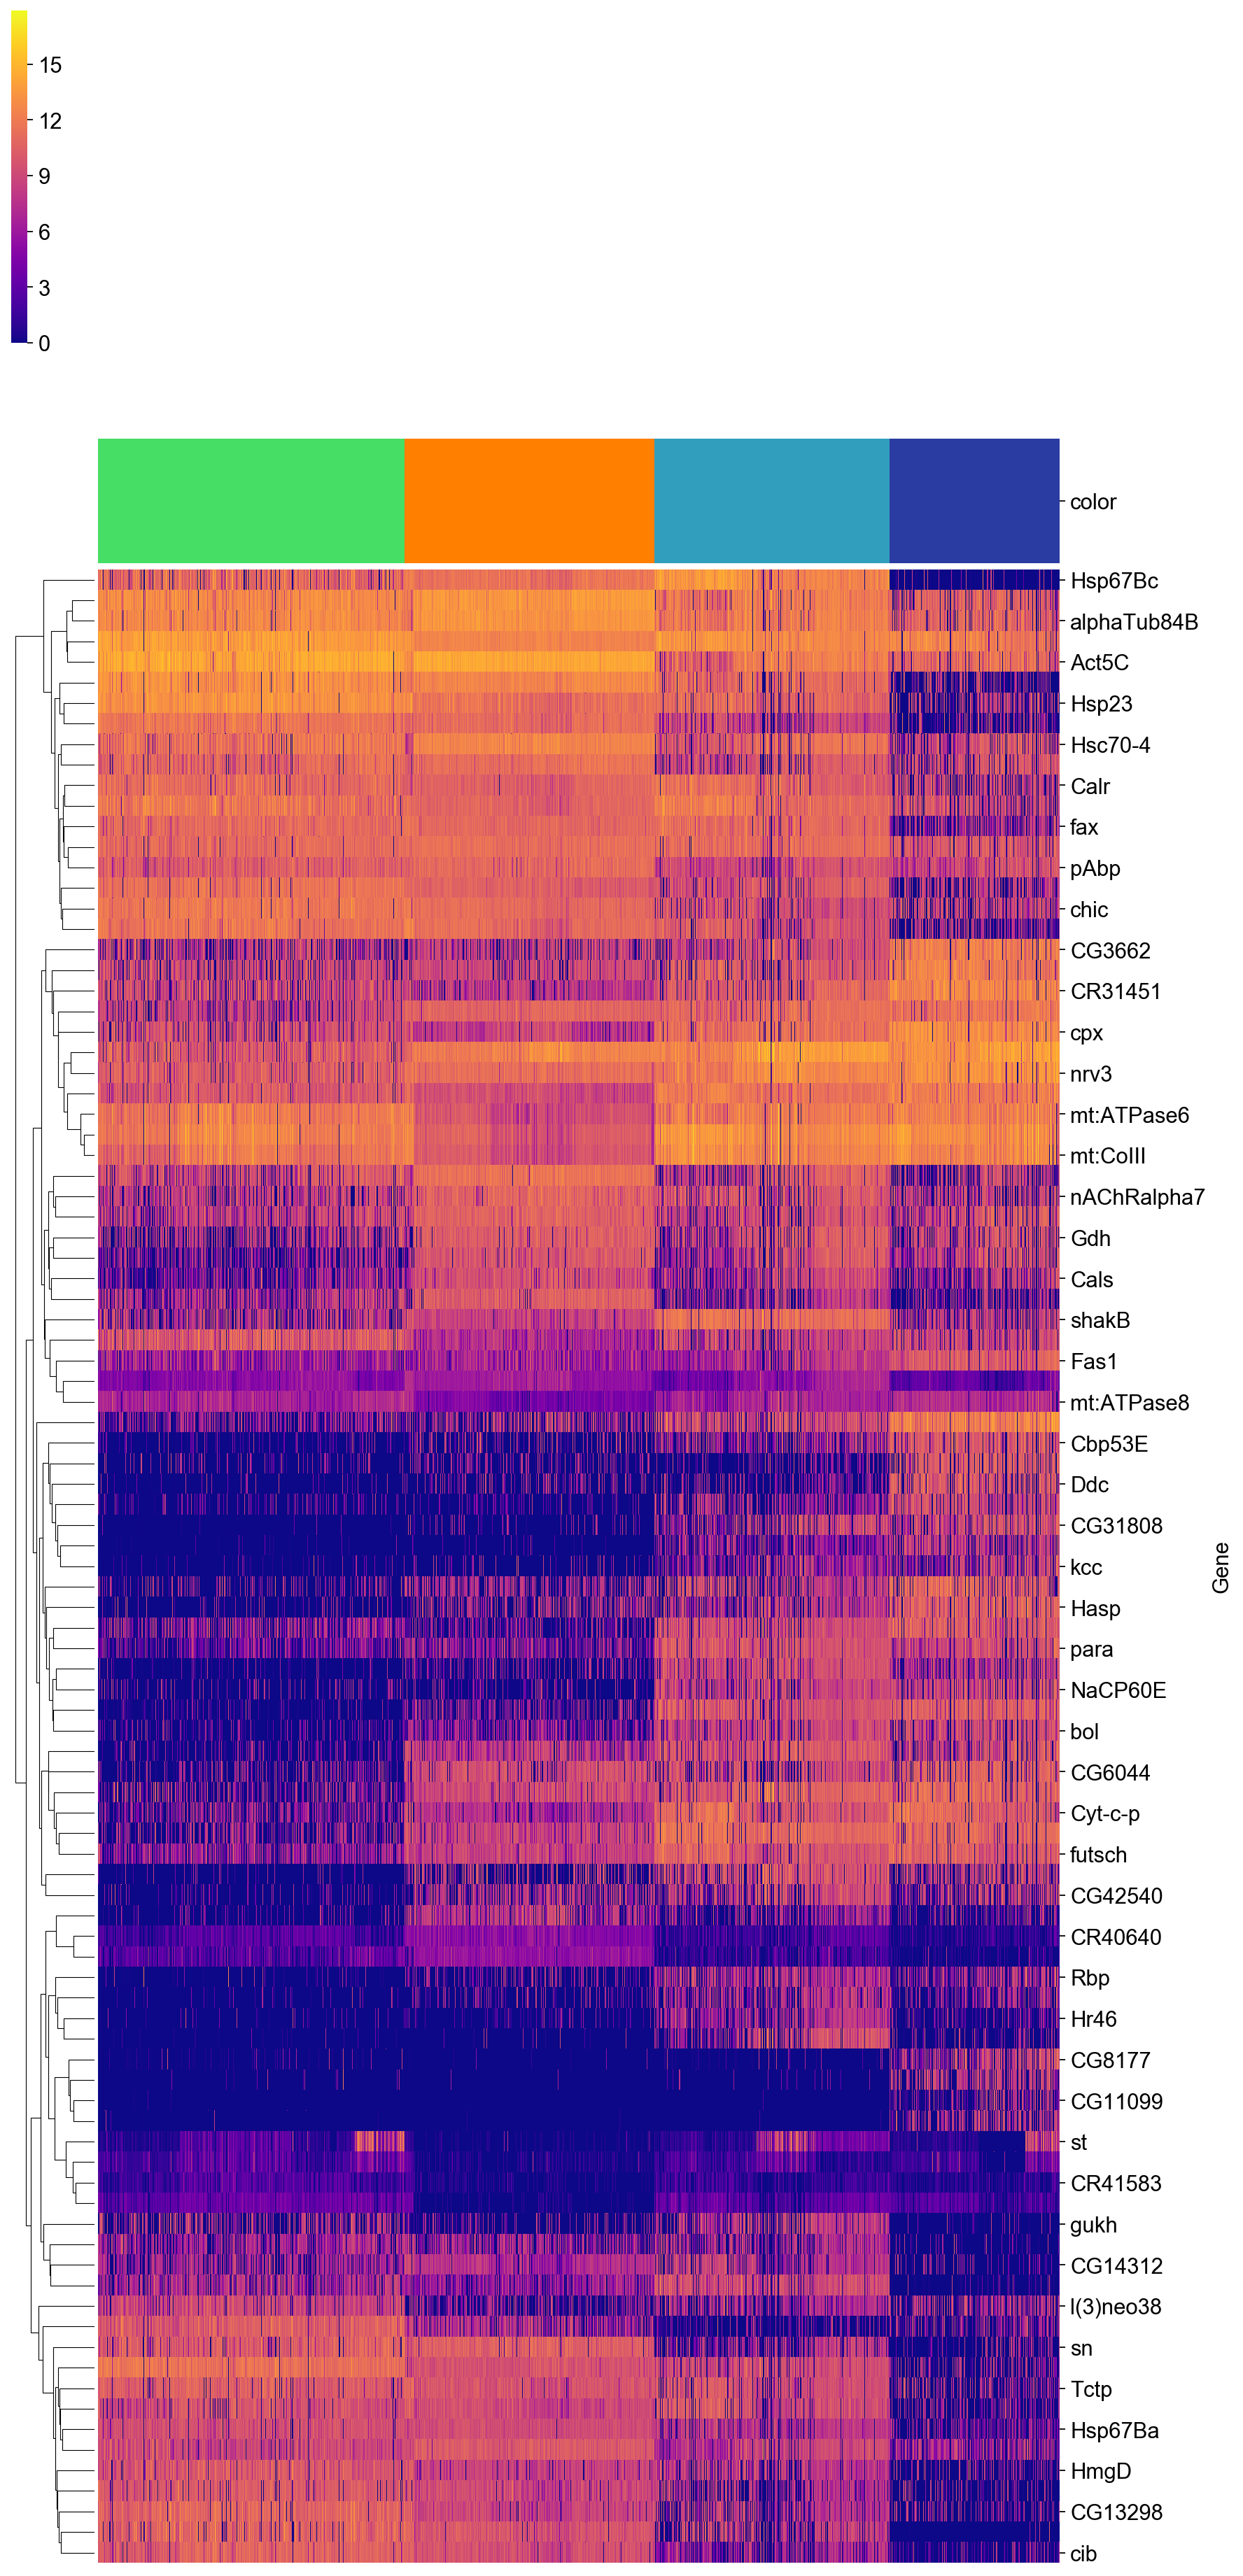

In [40]:
# Calculate clustering and plot
col_colors = df_libs.loc[Z.columns]["color"]

cm = sns.clustermap(Z, method="weighted", cmap="plasma", col_colors=col_colors, figsize=(12,30),row_cluster=True, col_cluster=False)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cm.ax_heatmap.set_ylabel("Gene")
cm.ax_heatmap.set_xticks([])
cm.ax_heatmap.set_xticklabels([])

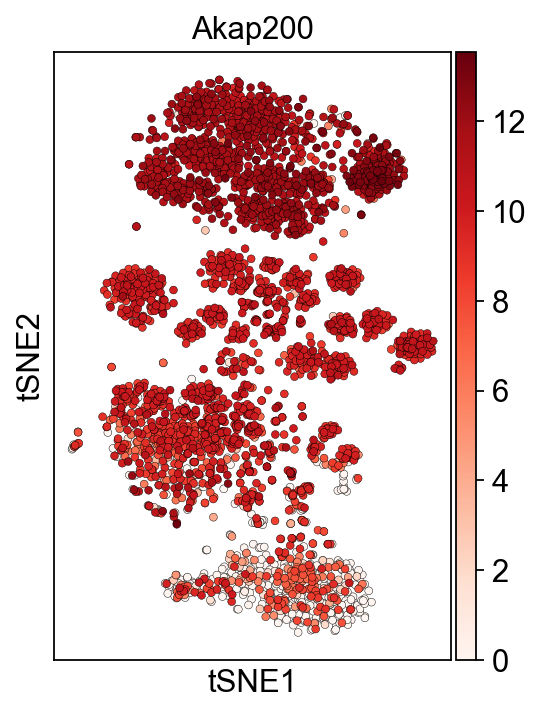

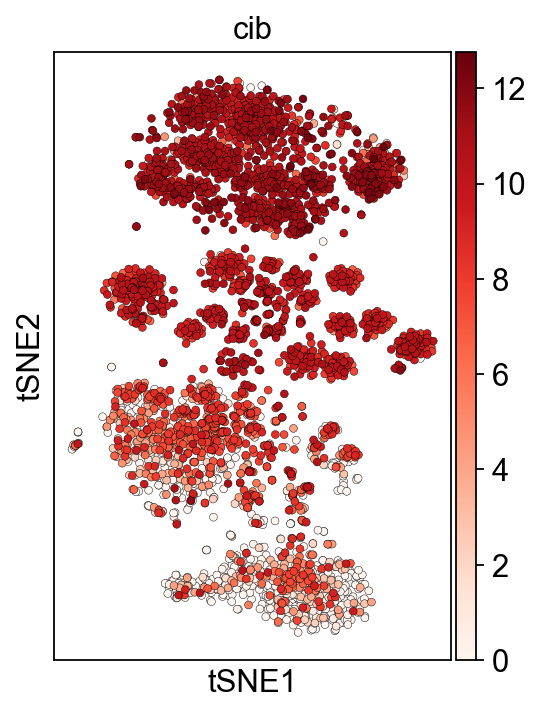

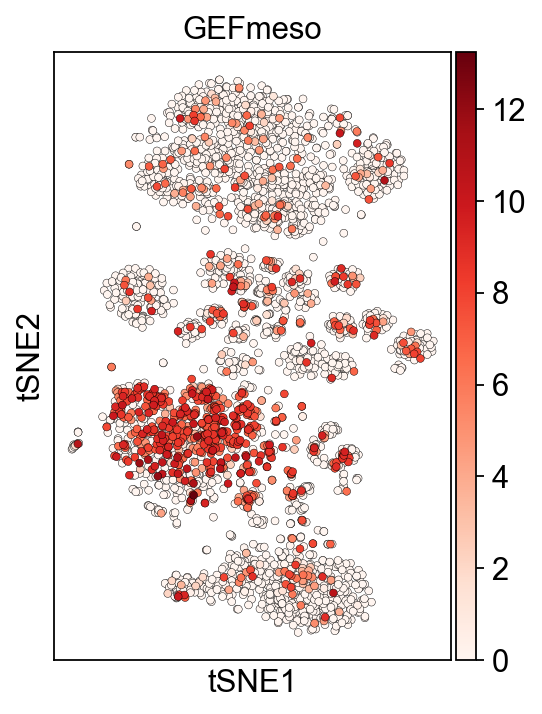

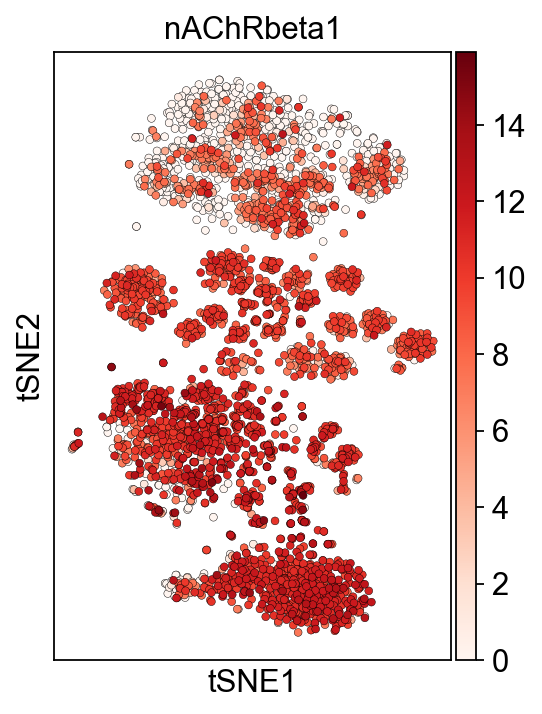

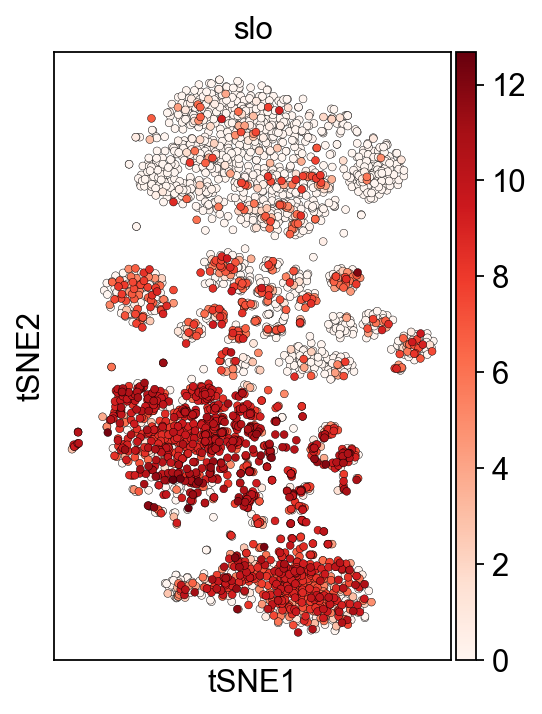

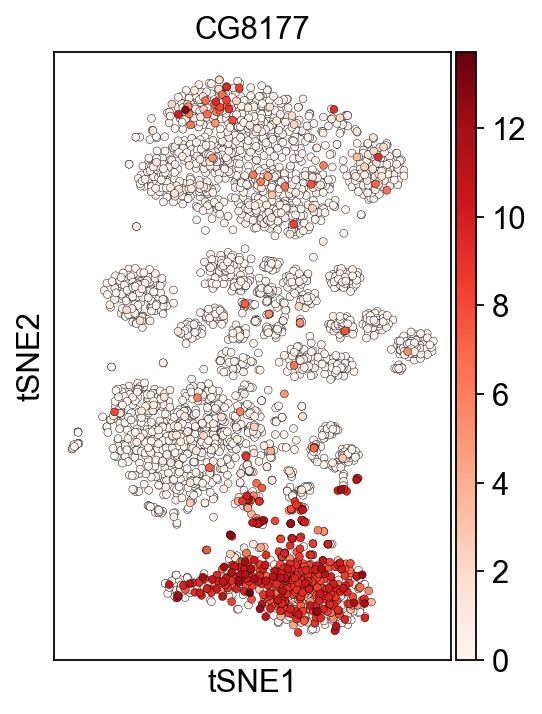

In [41]:
MyGenes = ['Akap200','cib','GEFmeso','nAChRbeta1','slo','CG8177']
sc.set_figure_params(figsize=(3.5,5),dpi_save=600)
for gene in MyGenes:
    sc.pl.tsne(adata, color=gene, size=(50,50), edgecolor="k", linewidths=0.2,
               color_map="Reds")#, save= '_'+gene+'.pdf')